Connected to Python 3.10.4



Epoch 1/5


1875/1875 [==============================] - 26s 13ms/step - loss: 0.5110 - accuracy: 0.8528
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1392 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0954 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0769 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5410 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1445 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0997 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0794 - accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step 

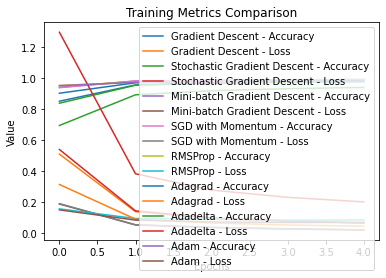

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
import matplotlib.pyplot as plt

# Define hyperparameters
batch_size = 32
epochs = 5
learning_rate = 0.01

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data for CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define optimizer dictionaries
optimizers = {
    "Gradient Descent": SGD(learning_rate=learning_rate),
    "Stochastic Gradient Descent": SGD(learning_rate=learning_rate),
    "Mini-batch Gradient Descent": SGD(learning_rate=learning_rate, momentum=0.9),
    "SGD with Momentum": SGD(learning_rate=learning_rate, momentum=0.9),
    "RMSProp": RMSprop(learning_rate=learning_rate),
    "Adagrad": Adagrad(learning_rate=learning_rate),
    "Adadelta": Adadelta(learning_rate=learning_rate),
    "Adam": Adam(learning_rate=learning_rate),
}

# Train and evaluate models with each optimizer
results = {}
for name, optimizer in optimizers.items():
    # Create and compile model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    # Train and store results
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    results[name] = (history.history["accuracy"], history.history["loss"])

# Compare results
for name, (acc, loss) in results.items():
    print(f"{name}:")
    print(f"- Accuracy: {acc[-1]}")
    print(f"- Loss: {loss[-1]}")

# Plot accuracy and loss curves (optional)
for name, (acc, loss) in results.items():
    plt.plot(acc, label=f'{name} - Accuracy')
    plt.plot(loss, label=f'{name} - Loss')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Training Metrics Comparison')
plt.show()